###EDA 

In [ ]:
#So, let's import the data set, cut it to the relevant size (acording to the dataset) and find out how they look like exactly.


! pip install -q kaggle
from google.colab import files
files.upload()#choosing the API json file

In [ ]:
! mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mv: cannot stat 'kaggle.json': No such file or directory
ref                                                     title                                         size  lastUpdated          downloadCount  
------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                             429KB  2020-11-13 12:45:46           3177  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                      353MB  2020-11-09 18:51:59           2009  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University     2MB  2020-11-13 06:04:14            868  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates      199MB  2020-10-23 16:56:10            375  
etsc9287/2020

In [ ]:
! kaggle datasets download -d imetomi/eur-usd-forex-pair-historical-data-2002-2019
! ls

eur-usd-forex-pair-historical-data-2002-2019.zip: Skipping, found more recently modified local copy (use --force to force download)
eur-usd-forex-pair-historical-data-2002-2019.zip  eurusd_news.csv
eurusd_hour.csv					  sample_data
eurusd_minute.csv


In [ ]:
! unzip 'eur-usd-forex-pair-historical-data-2002-2019.zip'
! ls

Archive:  eur-usd-forex-pair-historical-data-2002-2019.zip
replace eurusd_hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: eurusd_hour.csv         
replace eurusd_minute.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: eurusd_minute.csv       y

  inflating: eurusd_news.csv         
eur-usd-forex-pair-historical-data-2002-2019.zip  eurusd_news.csv
eurusd_hour.csv					  sample_data
eurusd_minute.csv


In [ ]:
import pandas as pd

eur_usd_minute_data = pd.read_csv('eurusd_minute.csv')
eur_usd_minute_data.head()

Date  Minute  BidOpen  BidHigh  ...  AskHigh  AskLow  AskClose  AskChange
0  2002-05-05  1188.0   0.9168   0.9168  ...   0.9178  0.9178    0.9178        0.0
1  2002-05-06  1259.0   0.9181   0.9181  ...   0.9184  0.9184    0.9184        0.0
2  2002-05-07  1259.0   0.9152   0.9152  ...   0.9155  0.9155    0.9155        0.0
3  2002-05-08  1259.0   0.9042   0.9042  ...   0.9045  0.9045    0.9045        0.0
4  2002-05-09  1259.0   0.9092   0.9092  ...   0.9095  0.9095    0.9095        0.0

[5 rows x 12 columns]

In [ ]:
#I am now going to make a datetime index for it and just prot everything to see how will it be.
type(eur_usd_minute_data.loc[0,'Date']),type(eur_usd_minute_data.loc[0,'Minute'])
#what is the type of the date and Minute columns? Isn't it already datetime?

(str, numpy.float64)

In [ ]:
#making the index as datetime objects

eur_usd_minute_data.index = pd.to_datetime(eur_usd_minute_data['Date'])+pd.to_timedelta(eur_usd_minute_data['Minute'],unit='m')
eur_usd_minute_data.head()

Date  Minute  BidOpen  ...  AskLow  AskClose  AskChange
2002-05-05 19:48:00  2002-05-05  1188.0   0.9168  ...  0.9178    0.9178        0.0
2002-05-06 20:59:00  2002-05-06  1259.0   0.9181  ...  0.9184    0.9184        0.0
2002-05-07 20:59:00  2002-05-07  1259.0   0.9152  ...  0.9155    0.9155        0.0
2002-05-08 20:59:00  2002-05-08  1259.0   0.9042  ...  0.9045    0.9045        0.0
2002-05-09 20:59:00  2002-05-09  1259.0   0.9092  ...  0.9095    0.9095        0.0

[5 rows x 12 columns]

In [ ]:
#Then we will delete the columns date and minute

eur_usd_minute_data = eur_usd_minute_data.drop(['Date',
                                                'Minute',
                                                'BidChange',
                                                'AskChange'],axis = 1)

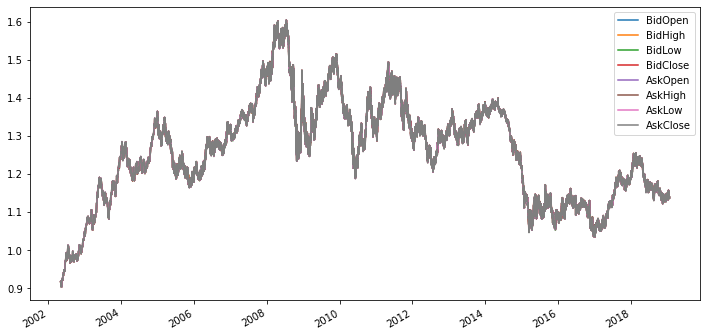

In [ ]:
eur_usd_minute_data.plot(figsize=(12,6))

In [ ]:
eur_usd_minute_data.describe()

BidOpen       BidHigh  ...        AskLow      AskClose
count  5.164235e+06  5.164235e+06  ...  5.164235e+06  5.164235e+06
mean   1.281438e+00  1.281550e+00  ...  1.281483e+00  1.281594e+00
std    1.221712e-01  1.221828e-01  ...  1.221586e-01  1.221702e-01
min    9.026000e-01  9.026000e-01  ...  9.029000e-01  9.029000e-01
25%    1.182180e+00  1.182270e+00  ...  1.182250e+00  1.182340e+00
50%    1.291970e+00  1.292090e+00  ...  1.292040e+00  1.292160e+00
75%    1.361660e+00  1.361760e+00  ...  1.361710e+00  1.361800e+00
max    1.603830e+00  1.603840e+00  ...  1.603220e+00  1.603810e+00

[8 rows x 8 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f409fcc20b8>,
      dtype=object)

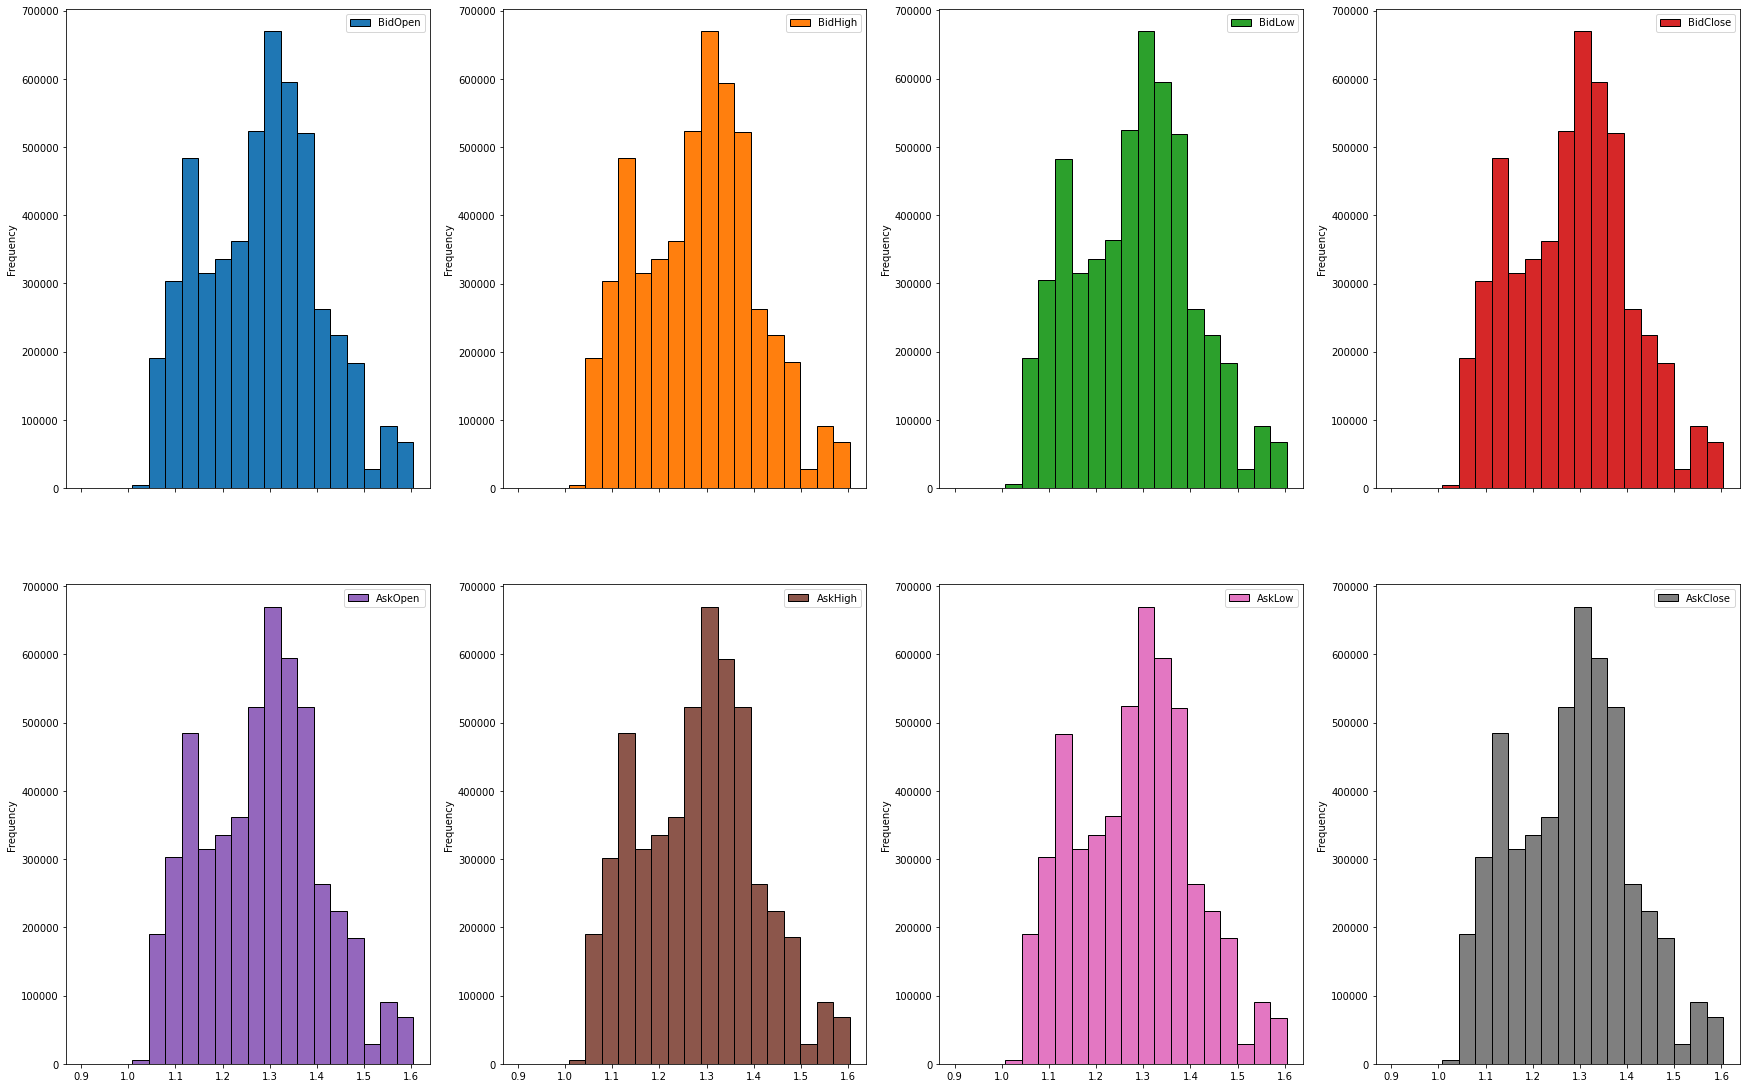

In [ ]:
# distribution

eur_usd_minute_data.plot.hist(subplots = True,
                              bins = 20,
                              layout = (3,4),
                              figsize = (30,30),
                              ec = 'black')

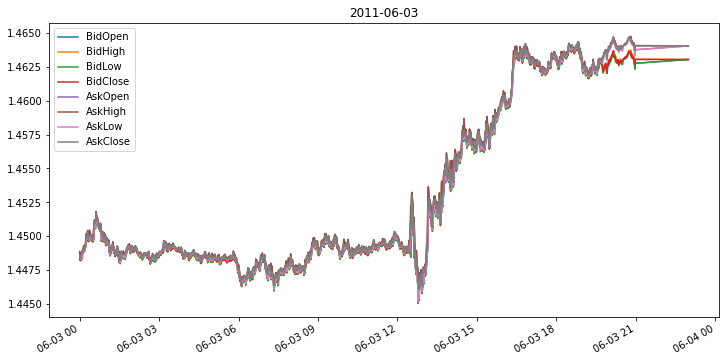

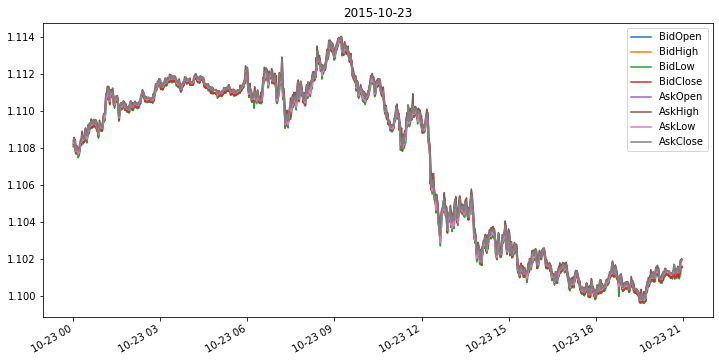

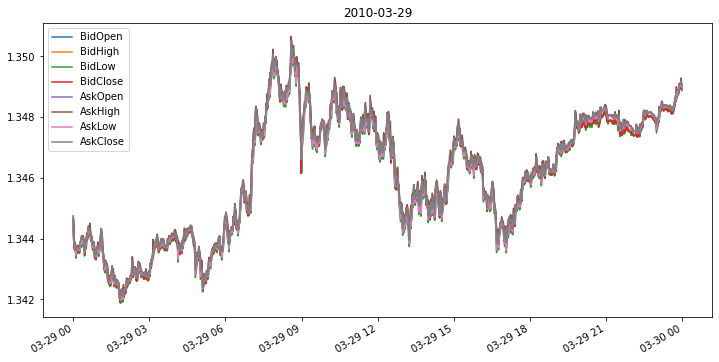

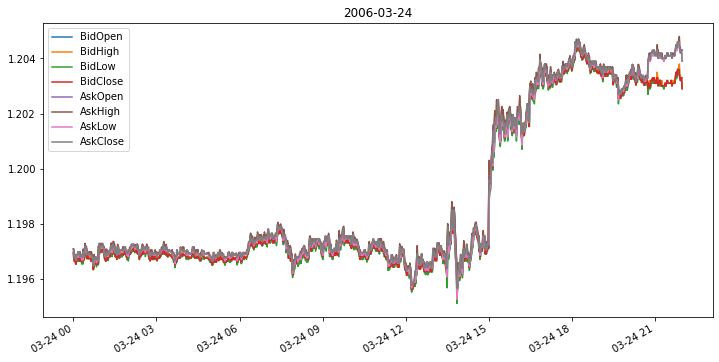

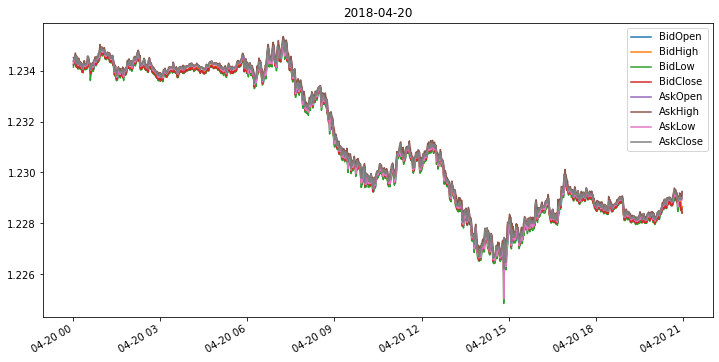

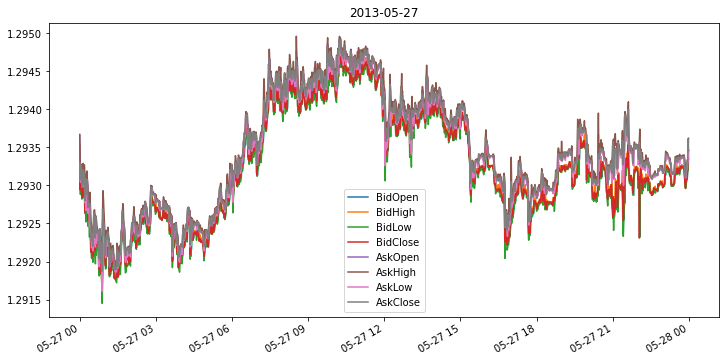

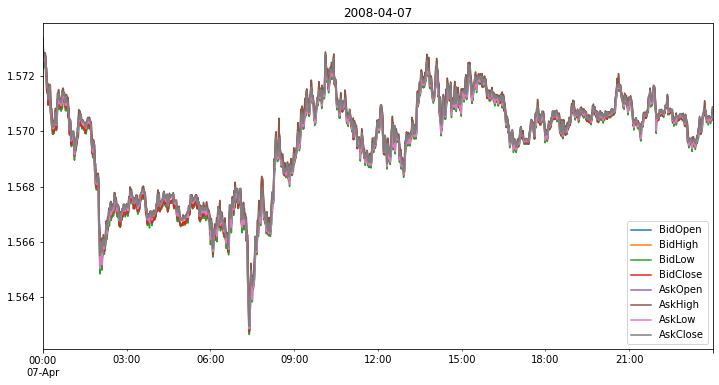

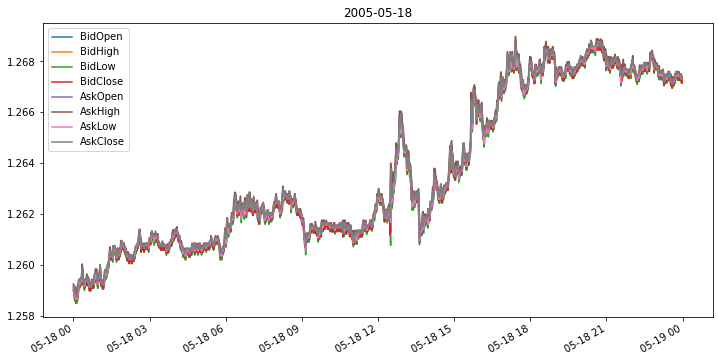

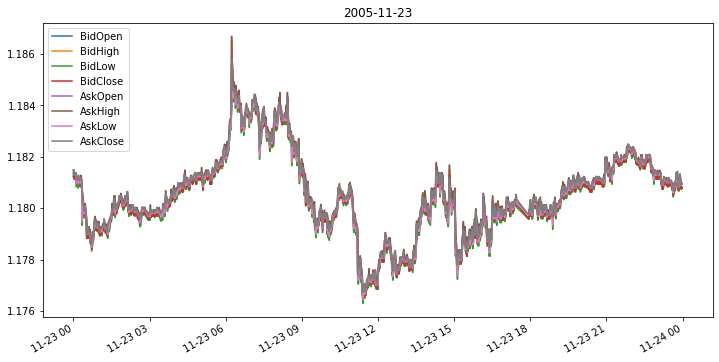

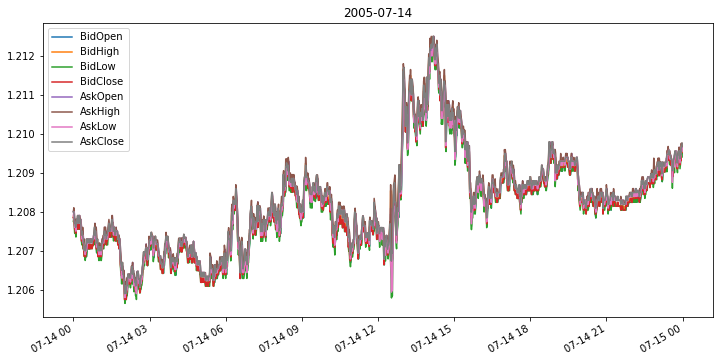

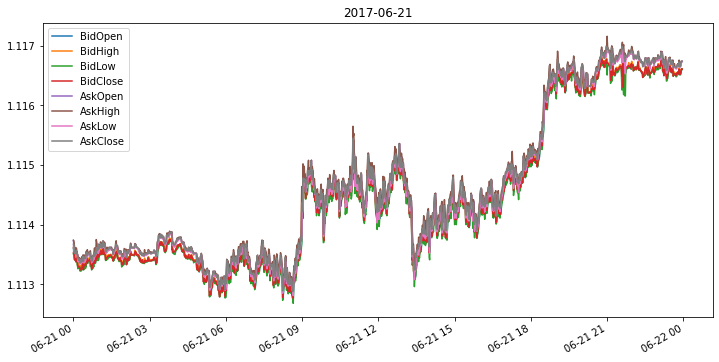

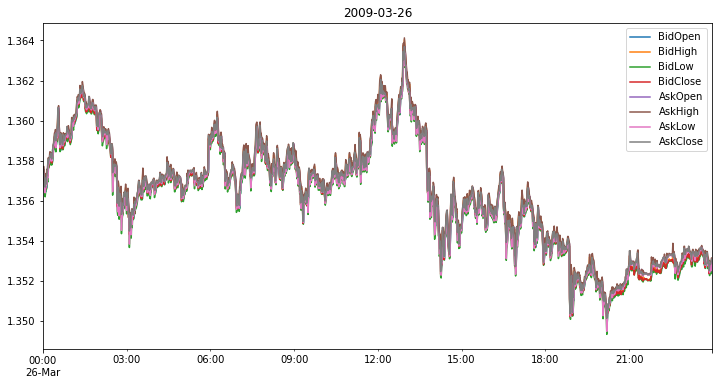

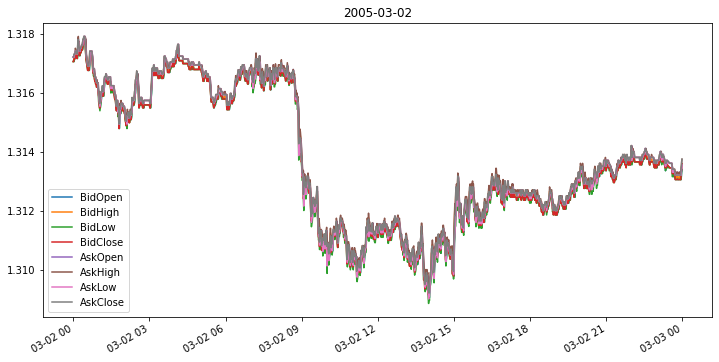

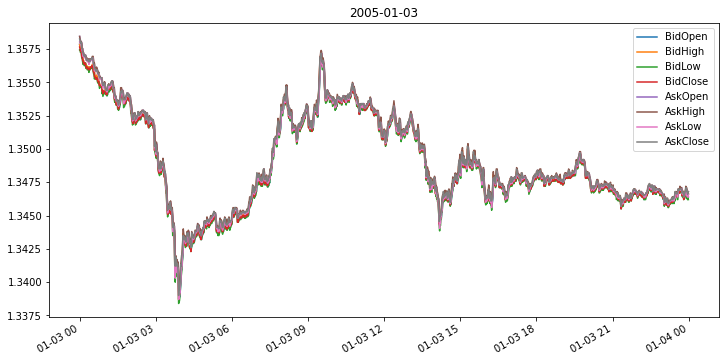

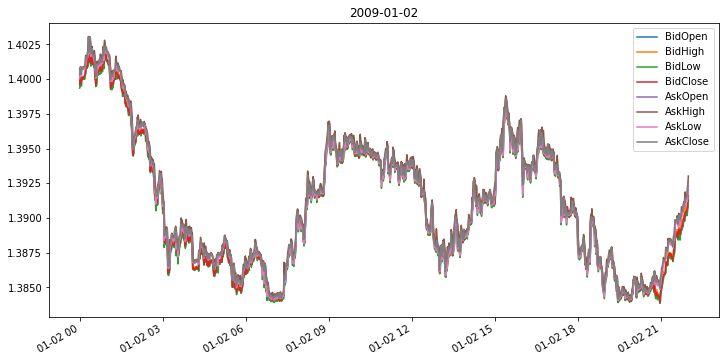

In [ ]:
#random days plots
import numpy as np

row_numbers = list(np.random.randint(0,len(eur_usd_minute_data),15))
days = eur_usd_minute_data.iloc[row_numbers,:].index.date
days_data = []
for date in days:
  a_day = pd.DataFrame(columns=eur_usd_minute_data.keys())
  a_day = a_day.append(eur_usd_minute_data.loc[eur_usd_minute_data.index.date == date ])
  days_data.append(a_day)
for day in days_data:
  day.plot(title = str(day.index.date[0]),figsize=(12,6))